In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [421]:
#Importing the data 
train_data= pd.read_excel("Data_Train.xlsx")

In [422]:
pd.set_option('display.max_columns', None)

In [423]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [424]:
train_data.shape

(10683, 11)

In [425]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [426]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [427]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 10m      1
35h 35m      1
13h 35m      1
47h          1
32h 55m      1
Name: Duration, Length: 368, dtype: int64

In [428]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [429]:
#Dropping of null values
train_data.dropna(inplace=True)

In [430]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis and Feature Engineering

In [431]:
#Majority of the independent features need proper cleaning for the machine learning model to be able to understand in order
#to make proper predictions

 From the table, it can be observed that the Date_of_Journey column is object dtype. Therefore, we have to convert the dtype to time stamp so as to use the column for proper prediction
 
 With pandas, this can be achieved using pandas to_datetime to convert object dtype to datetime dtype


In [432]:
train_data['Journey_Day']= pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.day
train_data['Journey_Month']= pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

#Year won't be required because the year under review in the dataset is 2019

In [433]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [434]:
#Since we have extracted 'Journey_Day' and 'Journey_month' from 'Date_of_Journey' column, then the 'Date_of_Journey' column is not needed and hence should ne dropped

train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [435]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [436]:
#Departure time and minutes the airplane leaves the aiport
#Similar to what was performed for 'Date_of_Journey' will also be performed for "Departure Time"

#Extracting Hours
train_data['Departure_Hour']= pd.to_datetime(train_data.Dep_Time).dt.hour

#Extracting Minutes
train_data['Departure_Minutes']= pd.to_datetime(train_data.Dep_Time).dt.minute

#haven performed the two steps above, the "Dep_Time" feature can be dropped
train_data.drop('Dep_Time', axis=1, inplace=True)

In [437]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [438]:
#Arrival time and minutes is the time an airplane gets to the aiport
#Similar to what was performed for 'Date_of_Journey' will also be performed for "Arrival Time"

#Extracting Hours
train_data['Arrival_Hour']= pd.to_datetime(train_data.Arrival_Time).dt.hour

#Extracting Minutes
train_data['Arrival_Minutes']= pd.to_datetime(train_data.Arrival_Time).dt.minute

#haven performed the two steps above, the "Arrival_Time" feature can be dropped
train_data.drop('Arrival_Time', axis=1, inplace=True)

In [439]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [440]:
#Duration is simply the time taken by the airplane from one destination to the other
#It can also be seen as the difference between the departure time and the arrival time

In [441]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [442]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [443]:
train_data.drop('Duration', axis=1, inplace=True)

In [444]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [445]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical data

#OneHotEncoding and LabelEncoding are two of the ways withw hcih categorical data can be converted. The categorical column needs to converted for machine learning model to be able to understand and interprete accordingly

In [446]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

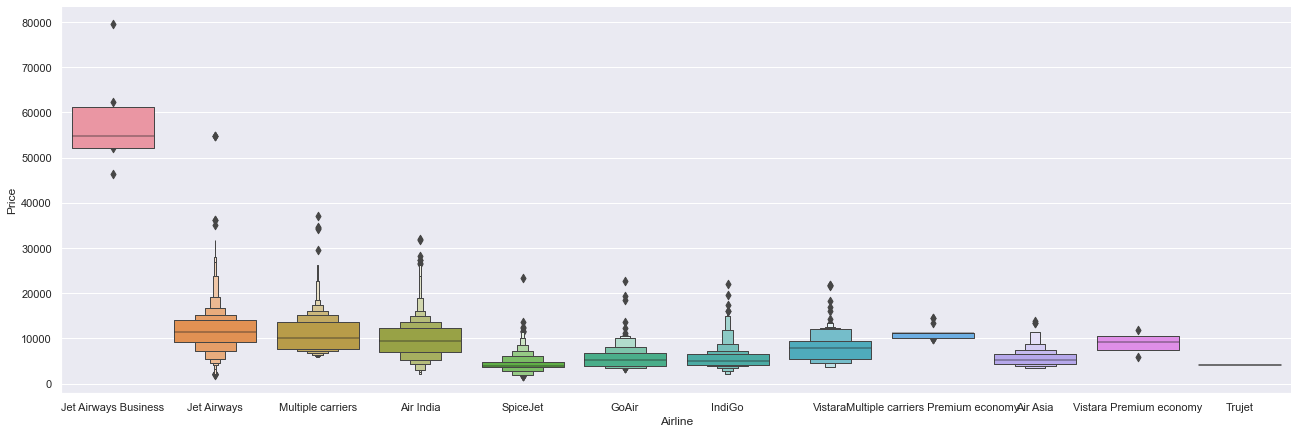

In [447]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [448]:
#The Ariline feature is a norminal categorical data and hence, one hot encoding will be used
Airline= train_data[['Airline']]
Airline= pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [449]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

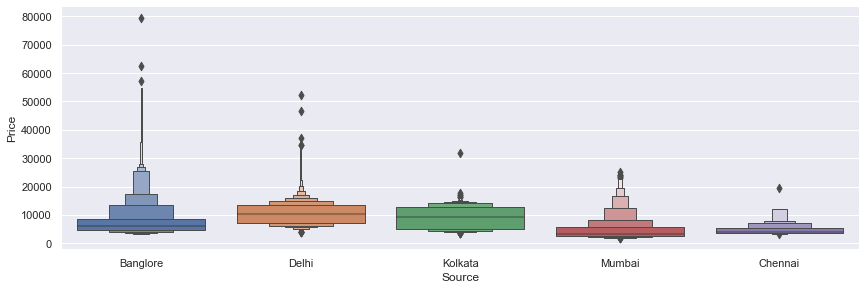

In [450]:
#Finding the relationship between Source and Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [451]:
#The graph above clearly shows there are aoutliers in Sources like Banglore, Delhi, Kolkata and Chennai

In [452]:
#The Source column also contains norminal categorical features, OneHotEncoding will also be performed

Source= train_data[['Source']]
Source= pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [453]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [454]:
#The Destination column also contains norminal categorical features, OneHotEncoding will also be performed

Destination= train_data[['Destination']]
Destination= pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [455]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [456]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [457]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [458]:
#Route and Total_stops columns are related to each other. One of these columns need to be dropped to prevent multi-colineality issues
#Also, Additional_Info columns contain 78.1% 'No Info' meaning reliable percentage of the data were not recorded. The Additional_Info column can justfiably be dropped 

train_data.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

In [459]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [460]:
train_data['Total_Stops']= train_data['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [461]:
#We need to concatenate new columns that we created to the train_data---- that is  train_data + Airline + Source + Destination

data_train= pd.concat([train_data, Airline, Destination, Source], axis=1)

In [462]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [463]:
#At this point, Airline, Source and Destination columns are not needed. These columns has to be dropped

data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [464]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [465]:
data_train.shape

(10682, 30)

### Test Dataset

In [466]:
test_data= pd.read_excel('Test_set.xlsx')

In [467]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [468]:
#Preprocessing
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [469]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature Selection

#Features of the datset that have stron relationship and correelation with the target variable need to be selected in order to prevent curse of dimentionality issue. Feature Selection helps to have high degree of accuracy.
Some of the feature selection techniques include Heatmaps, Feature_Importance_, SelectKBest and the rest

In [470]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [471]:
data_train.shape

(10682, 30)

In [472]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Departure_Hour', 'Departure_Minutes', 'Arrival_Hour',
       'Arrival_Minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [473]:
X= data_train.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month',
       'Departure_Hour', 'Departure_Minutes', 'Arrival_Hour',
       'Arrival_Minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [474]:
y= data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [475]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10682.0,0.824190,0.675229,0.0,0.0,1.0,1.0,4.0
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_Day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
Journey_Month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Departure_Hour,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
Departure_Minutes,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
Arrival_Hour,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
Arrival_Minutes,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0
Duration_hours,10682.0,10.244898,8.494916,0.0,2.0,8.0,15.0,47.0
Duration_mins,10682.0,28.326624,16.945817,0.0,15.0,30.0,45.0,55.0


In [476]:
data_train.corr()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,0.490170,-0.447390,-0.260752,-0.234758,-0.015302,-0.234758,0.490170,0.032761,-0.260752
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,0.270676,-0.313417,-0.230755,-0.179223,0.189777,-0.179223,0.270676,0.009358,-0.230755
Journey_Day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.100088,0.002632,-0.014030,0.006611,-0.075254,0.006611,0.100088,-0.060558,-0.014030
Journey_Month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.139222,0.090490,-0.039352,0.005650,-0.453685,0.005650,0.139222,0.087177,-0.039352
Departure_Hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,-0.014846,-0.118780,0.155471,-0.017292
Departure_Minutes,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,-0.085534,0.003200,0.037705,0.067110,0.107129,0.067110,-0.085534,-0.024238,0.037705
Arrival_Hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,-0.014795,-0.006790,0.054693,-0.033512
Arrival_Minutes,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.030493,-0.209882,0.118573,0.081196
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,0.299819,-0.346192,-0.233326,-0.186668,0.004052,-0.186668,0.299819,0.123524,-0.233326
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952,-0.154126,0.218207,-0.018761,-0.098823,0.079866,-0.098823,-0.154126,0.013761,-0.018761


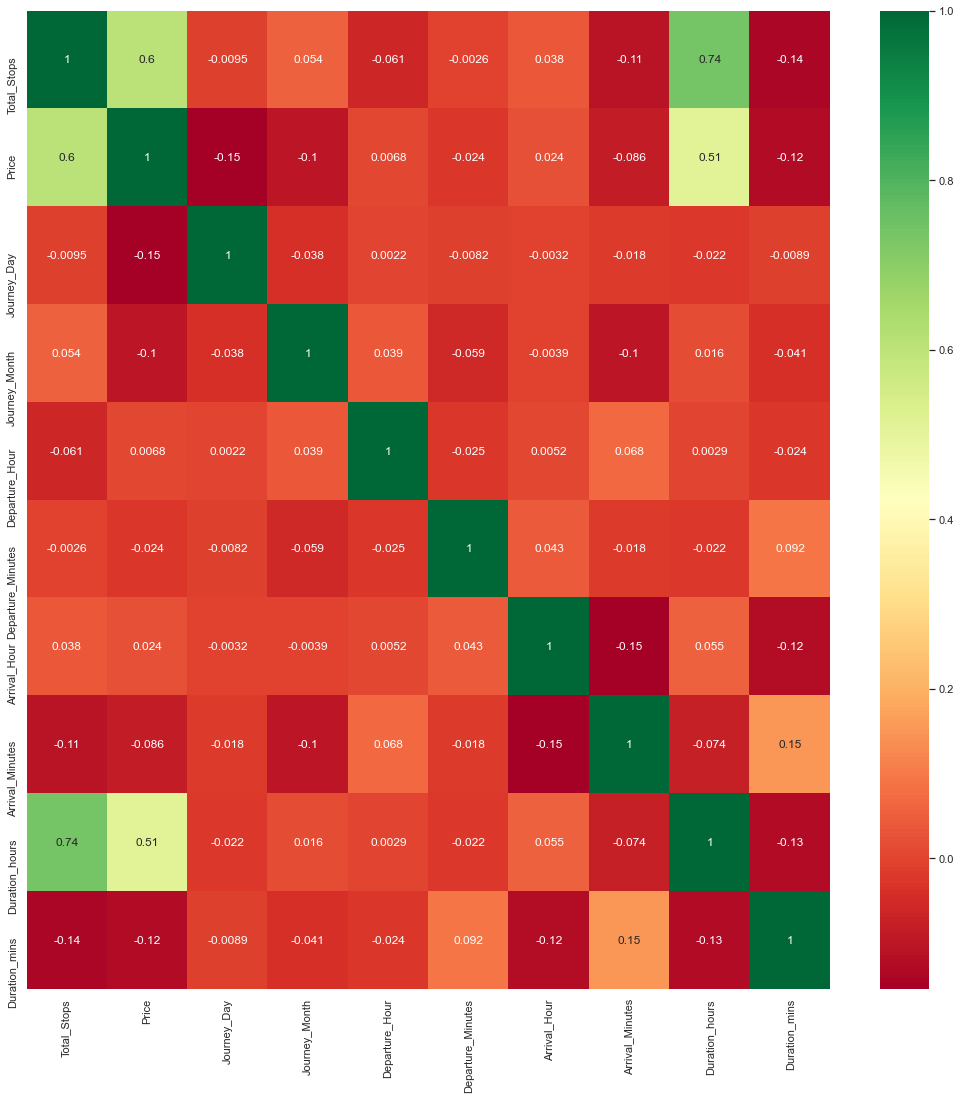

In [477]:
#Using the heatmap, mathematical correlations between the dependent and independent variables can be derived

plt.figure(figsize= (18,18))
sns.heatmap(train_data.corr(), annot=True, cmap = "RdYlGn")
plt.show()

In [478]:
#Importing ExtraTreesRegressor which predominantly is used in finding the feature importance of features of the dataset

from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [479]:
print(selection.feature_importances_)

[2.17690624e-01 1.42879411e-01 5.40550471e-02 2.43495909e-02
 2.13563940e-02 2.82937911e-02 1.85920943e-02 1.18010361e-01
 1.72693894e-02 9.78617002e-03 2.06998883e-03 1.75549796e-02
 1.46257664e-01 6.76616267e-02 1.77344356e-02 8.12996199e-04
 2.86946402e-03 1.06807423e-04 5.01292885e-03 8.05331134e-05
 1.39851321e-02 1.86097052e-02 8.40316760e-03 5.55208577e-04
 2.49778771e-02 4.50543736e-04 1.02877167e-02 3.25974550e-03
 7.02660621e-03]


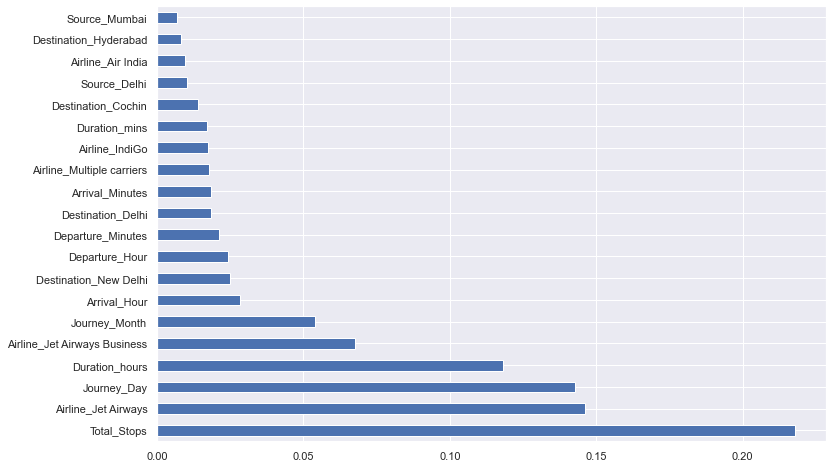

In [480]:
#plot graph of feature importances for proper visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [481]:
#Fitting Model Using Random Forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [482]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf= RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [483]:
y_pred= regressor_rf.predict(X_test)

In [484]:
regressor_rf.score(X_train, y_train)

0.9541636437491288

In [485]:
regressor_rf.score(X_test, y_test)

0.8091935144985627

#By using the LinearRegression Model

In [486]:
import sklearn
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [487]:
scaler= StandardScaler()
X_scaler= scaler.fit_transform(X)

In [488]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= X_scaler

vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features']=  X.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [489]:
vif

,VIF,Features
0,3.260028,Total_Stops
1,1.026983,Journey_Day
2,1.317969,Journey_Month
3,1.063336,Departure_Hour
4,1.110287,Departure_Minutes
5,1.083345,Arrival_Hour
6,1.141016,Arrival_Minutes
7,2.595442,Duration_hours
8,1.144544,Duration_mins
9,6.200378,Airline_Air India


#The essence of vif is to verify if the independent features of the dataset have multicolineality issue or not

In [490]:
regression= LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [491]:
regression.score(X_train, y_train)

0.6287188290265425

In [492]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [493]:
adj_r2(X_train,y_train)

0.627454336488876

In [494]:
#Let's check to see how the model fit the test data
regression.score(X_test, y_test)

0.5997170005927523

In [495]:
adj_r2(X_test, y_test)

0.5942076474922254

In [496]:
#To find out if the model is overfitting the training data through Regularization
lasscv= LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [497]:
alpha= lasscv.alpha_
alpha

0.030186451016981447

In [498]:
#Now that we have the best parameter, let's use lasso regression and see how well our data have fitted before

lasso_reg= Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.030186451016981447)

In [499]:
lasso_reg.score(X_test, y_test)

0.5997586188254371

#Our R-squared value before applying lasso_reg is the same when it was finally applied (60%). It is therefore safe to say, the model does not have overfitting issue

In [500]:
#Using the Ridge regression model
#RidgeCV returns the best alpha and coefficients after performing 10 cross validation
#Passing an array of randon numbers for the ridgecv to select best alpha from

alphas= np.random.uniform(low=0, high=10, size=(50,))
ridgecv=RidgeCV(alphas=alphas, cv=10, normalize=True)

In [501]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([7.10735643, 0.22296102, 9.06045337, 3.3862825 , 1.2615059 ,
       8.29285963, 6.45774617, 0.96212651, 8.82320754, 6.90465564,
       7.86737724, 3.34351521, 4.91228254, 2.43043286, 7.46874481,
       6.45830713, 9.41452594, 4.68557763, 3.30991767, 9.01798025,
       2.28459253, 9.55935545, 0.0572319 , 4.52383954, 8.31967599,
       8.11251363, 9.79470231, 3.32194768, 3.62476098, 8.13323462,
       5.39886718, 6.27144504, 9.02557427, 7.42398361, 0.80018816,
       9.20983485, 9.05804803, 3.22236439, 8.87723928, 2.63932072,
       9.72578161, 5.53404789, 8.39079097, 5.50753987, 1.80591729,
       4.11286248, 8.75237376, 8.02583875, 1.39309707, 0.87135891]),
        cv=10, normalize=True)

In [502]:
ridgecv.alpha_

0.057231899365961514

In [503]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.057231899365961514)

In [504]:
ridge_model.score(X_test, y_test)

0.6001190274534325

#It is safe to say there is no overfitting problem because we got the same value before applying any of the regularization technique

#Using visualization tool to see if the result is follloeing a Gausssiian distribution

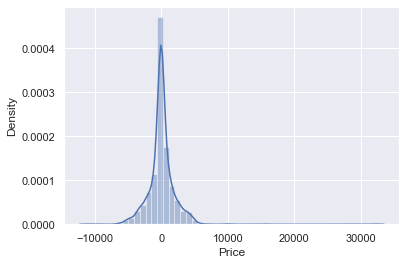

In [391]:
sns.distplot(y_test-y_pred)
plt.show()

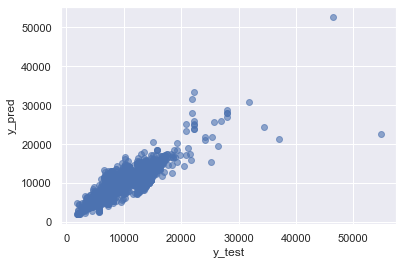

In [393]:
plt.scatter(y_test, y_pred, alpha = 0.6)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [394]:
from sklearn import metrics

In [395]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1209.890297313836
MSE: 3870384.8037250657
RMSE: 1967.3293582227318


In [396]:
metrics.r2_score(y_test, y_pred)

0.8112991456399907

### Hyperparameter Optimization

In [397]:
from sklearn.model_selection import RandomizedSearchCV

In [398]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [399]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [401]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regressor_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [402]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samp

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  24.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  19.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  21.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  22.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  19.8s
[CV] n_estimators=700, min_samples_split=5,

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 26.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [403]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [404]:
prediction = rf_random.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


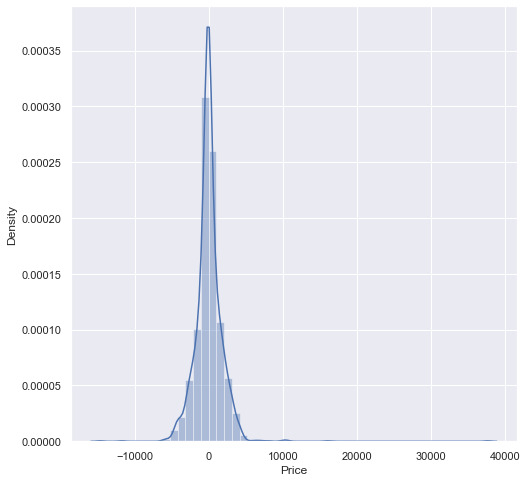

In [405]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

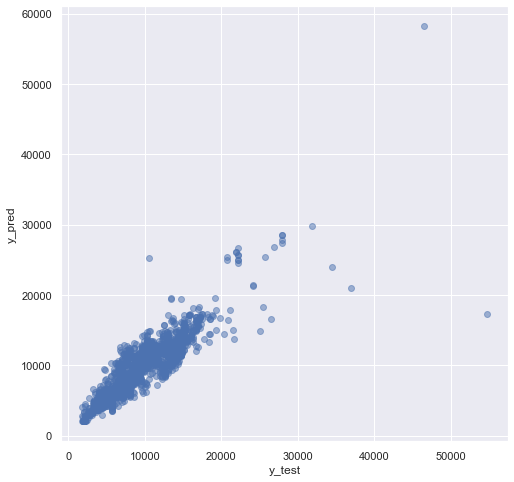

In [419]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [406]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1175.4542662844278
MSE: 3658375.547184572
RMSE: 1912.6880423071013


### Saving the data for Reusability

In [411]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(regressor_rf, file)

In [416]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [417]:
y_prediction = forest.predict(X_test)

In [418]:
metrics.r2_score(y_test, y_pred)

0.8112991456399907